In [11]:
 import pickle

In [59]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics import confusion_matrix
from sklearn.manifold import Isomap
from sklearn.ensemble import RandomForestClassifier
import math
import glob
import matplotlib.pyplot as plt
import urllib3
from sklearn.externals import joblib
import random
import matplotlib


In [61]:
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)

On affiche le cercle de corrélation de notre dataset

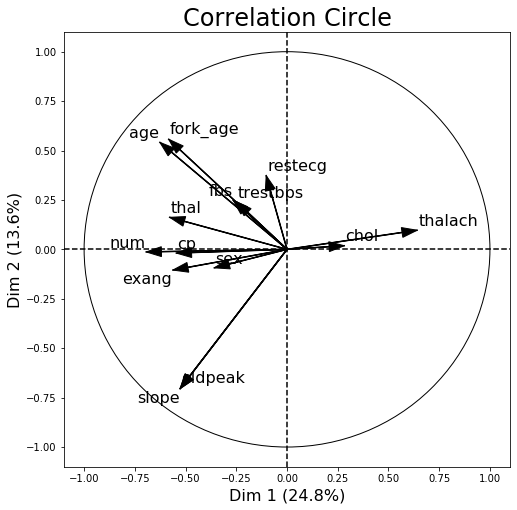

In [60]:
columns = list(df.columns)
x = df.loc[:, columns].values# Separating out the target
y = df.loc[:,['num']].values
scaler = StandardScaler()
x = StandardScaler().fit_transform(x)
figure, correlation_matrix = plot_pca_correlation_graph(x, 
                                                        columns,
                                                        figure_axis_size=8)

On remarque que la variable "num", l'indicateur qu'une personne soit atteinte d'une maladie cardiaque, est corrélée positivement fortement à la variable "cp" (douleur thoracique), assez corrélée aux variables "thal" (thalassémie), "sex". 
Il y a donc une forte corrélation positive entre les douleurs thoraciques et le fait que la personne ait une maladie cardiaque, mais aussi une corrélation assez forte entre le fait qu'une personne ait une thalassémie et le fait qu'il ait une maladie cardiaque. 
Une autre corrélation intéressante est la corrélation positive entre "oldpeak" et "slope". 


On étudie le nombre de personnes avec des maladies cardiaques dans notre dataset

Text(0.5, 1.0, 'Nombre de personnes ayant des maladies cardiaque')

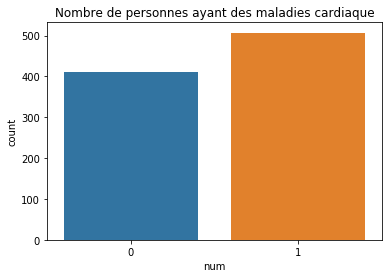

In [34]:
sns.countplot(x="num",data=df)
plt.title('Nombre de personnes ayant des maladies cardiaque')

On remarque que les personnes les plus nombreuses dans notre dataset sont celles ayant des maladies cardiaques

On réalise un graphe décrivant l'étendue du nombre de personnes selon leur Age 

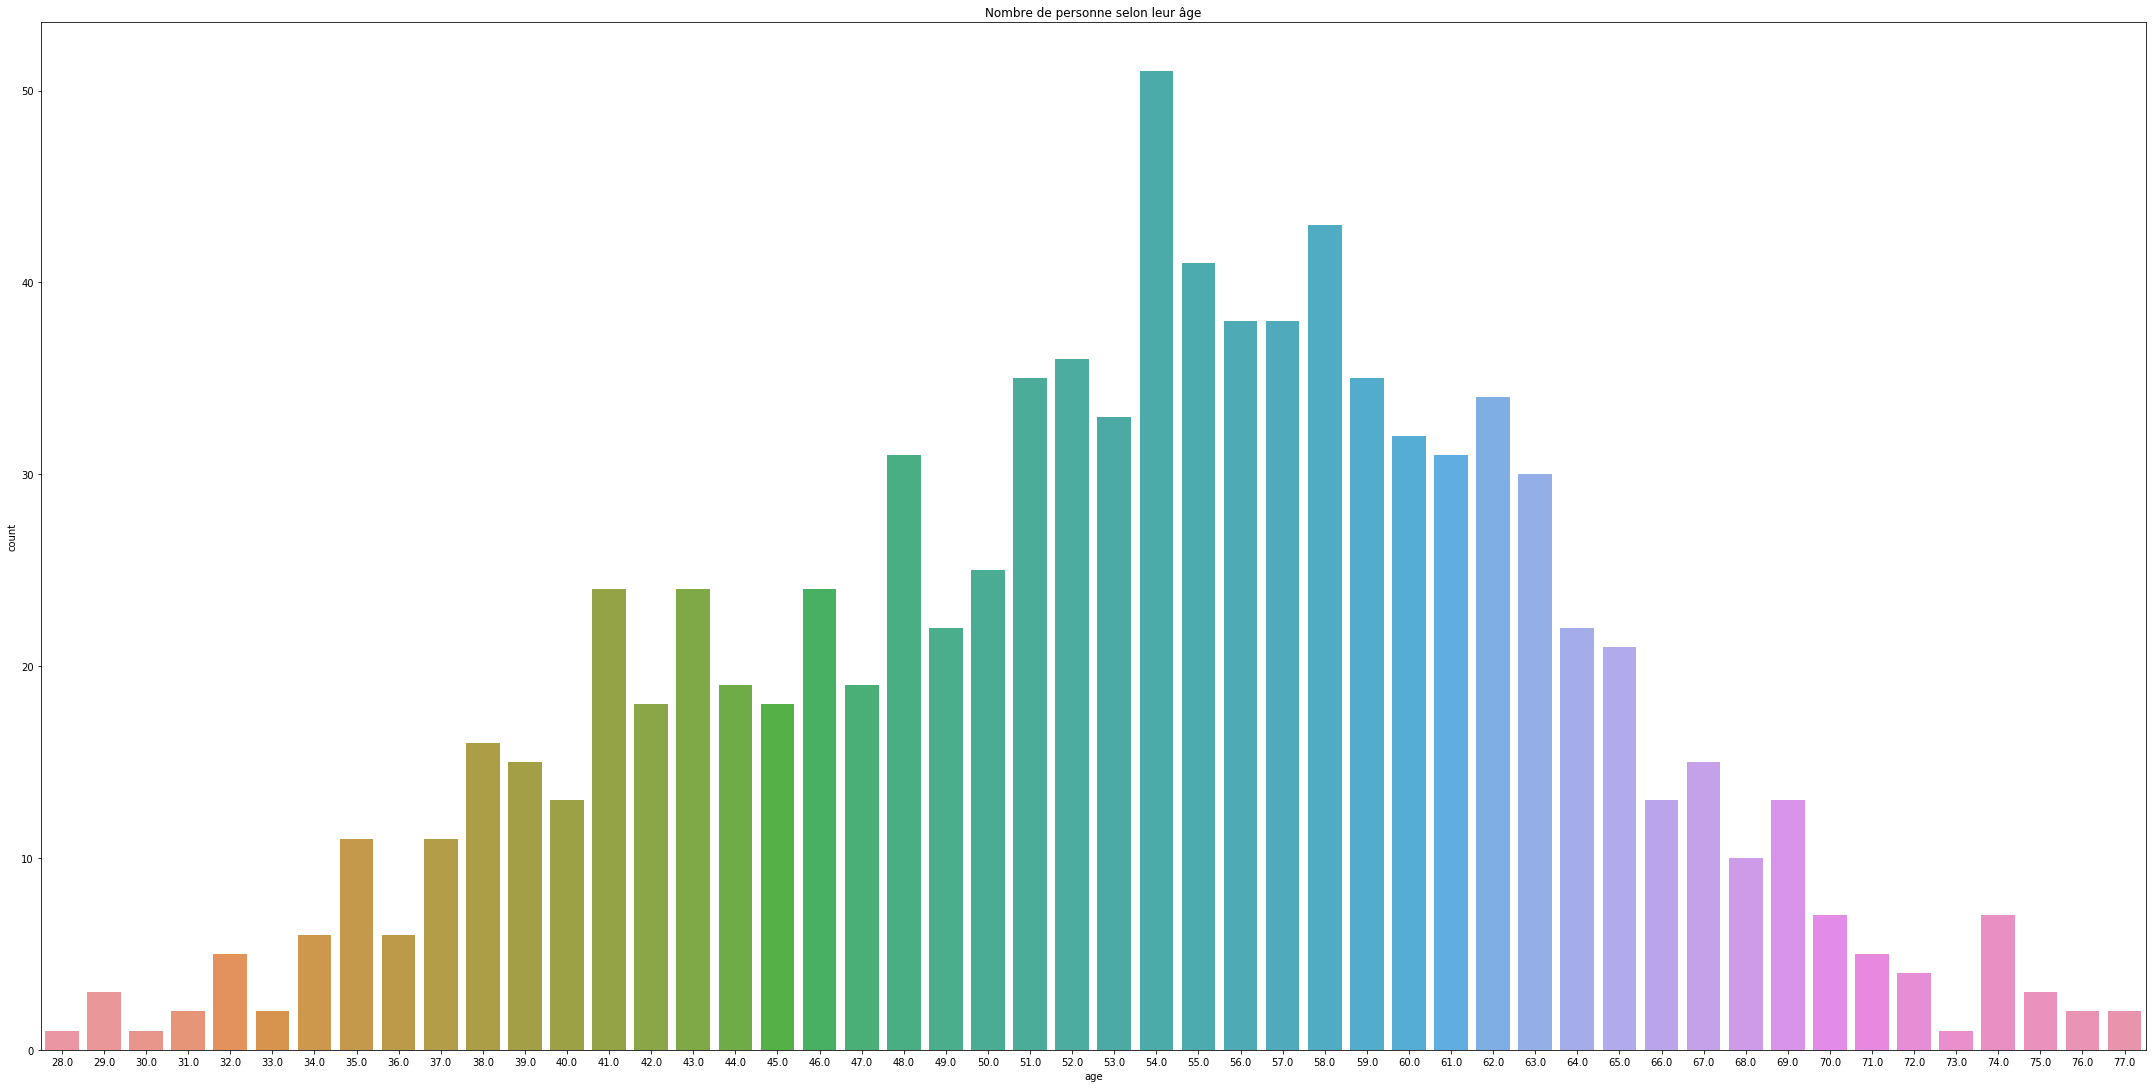

In [54]:
plt.figure(figsize=(30,15)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x="age", data=df)
plt.tight_layout()
plt.title('Nombre de personne selon leur âge')
plt.show()

Nous avons dans notre dataset une proportion plus élevé de personne environ agé entre 50 ans et 60 ans. On peut conclure de cela que notre étude se porte sur une partie de la population plutôt agé. D'ailleurs la proportion la plus élevé de personnes sont ceux agés de 54 ans 

On détermine le nombre de personnes en fonction de leur sexe

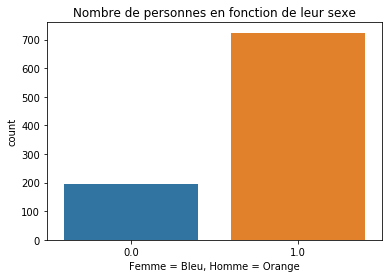

In [31]:
sns.countplot(x='sex', data=df)
plt.title('Nombre de personnes en fonction de leur sexe')
plt.xlabel("Femme = Bleu, Homme = Orange")
plt.show()

On remarque à l'aide de ce graphique une nette majorité d'homme dans notre dataset

On crée des variables qui déterminent si les hommes/femmes sont malades 

In [21]:
hommes_malades=df[(df.sex==1) & (df.num==1)]    

In [22]:
hommes_non_malades=df[(df.sex==1) & (df.num==0)]   

In [23]:
femmes_malades=df[(df.sex==0) & (df.num==1)]          

In [24]:
femmes_non_malades=df[(df.sex==0) & (df.num==0)]     


On détermine le pourcentage du nombre de femmes/hommes malades

On a un nombre très différent de femmes et d'hommes dans notre dataset, on ne peut donc pas précisément conclure de la comparaison du nombre de femmes malades et du nombre d'hommes malades, il serait intéressant de voir la proportion de femmes malades comparés à la proportion d'hommes malades

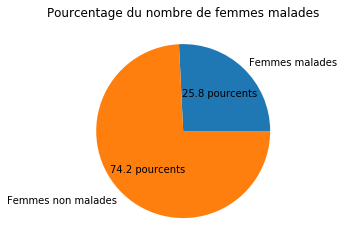

In [26]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie([len(femmes_malades), len(femmes_non_malades)],
        labels = ["Femmes malades", "Femmes non malades"],
        autopct="%1.1f pourcents")
plt.title("Pourcentage du nombre de femmes malades")
plt.show()

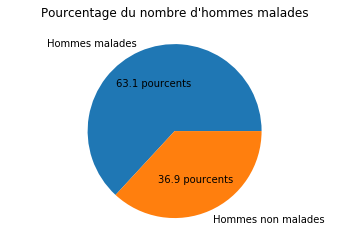

In [30]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie([len(hommes_malades), len(hommes_non_malades)],
        labels = ["Hommes malades", "Hommes non malades"],
        autopct="%1.1f pourcents")
plt.title("Pourcentage du nombre d'hommes malades")
plt.show()

On remarque à l’aide de ces deux graphiques ci dessus que les hommes malades sont en bien plus grande proportion que les femmes malades. En effet, 63,1% des hommes sont malades contre seulement 25,8% des femmes.


On détermine le nombre de personnes atteintes de douleur thoracique

Text(0.5, 0, '1.0 = angine typique - 2.0 = angine atypique - 3.0 =  douleur différente de celle de l’angine - 4.0 =  ”asymptotic”')

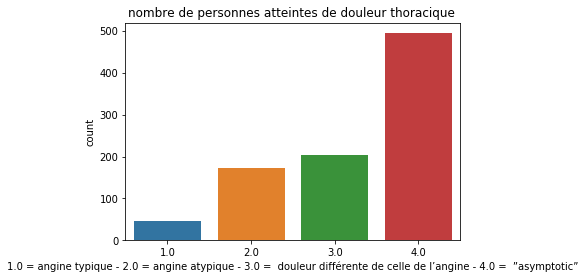

In [38]:
sns.countplot(x='cp', data=df)
plt.title("nombre de personnes atteintes de douleur thoracique ")
plt.xlabel("1.0 = angine typique - 2.0 = angine atypique - 3.0 =  douleur différente de celle de l’angine - 4.0 =  ”asymptotic”")

Implication de chaque maladie sur le fait d'avoir une maladie cardiaque

Comparons le nombre de personne atteinte de douleur thoracique avec le nombre de personnes qui est atteinte de maladie cardiaque

On détermine le nombre de personnes touchées par une douleur thoracique selon le type de douleur thoracique.
Pour cela on crée des variables qui compte les personnes malade et non malade pour chaque cas de douleur thoracique, "cp"

In [39]:
count_cp1 = len(df[(df.cp==1)&(df.num==0)])
count_cp1_malade = len(df[(df.cp==1)&(df.num==1)])

Text(0.5, 1.0, 'Nombre de personnes touchées par une douleur thoracique de type 1')

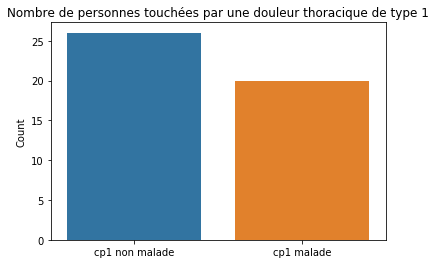

In [40]:
sns.barplot(x=["cp1 non malade","cp1 malade"],y=[count_cp1,count_cp1_malade])
plt.ylabel("Count")
plt.title("Nombre de personnes touchées par une douleur thoracique de type 1")

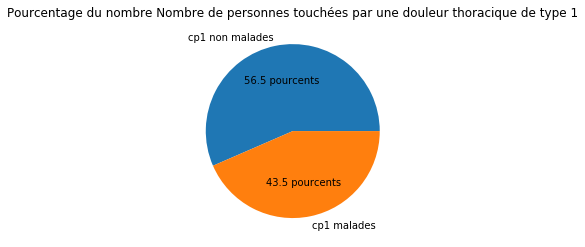

In [41]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie([len(df[(df.cp==1)&(df.num==0)]), len(df[(df.cp==1)&(df.num==1)])],
        labels = ["cp1 non malades", "cp1 malades"],
        autopct="%1.1f pourcents")
plt.title("Pourcentage du nombre Nombre de personnes touchées par une douleur thoracique de type 1")
plt.show()

Il y a une faible différence de proportion entre les personnes touchés par une angine typique malades et non malades. En effet, 56,5% des personnes qui ont une angine typique sont     diagnostiqués avec une maladie cardiaque contre 43,5% qui ne sont pas malades


In [42]:
count_cp2 = len(df[(df.cp==2)&(df.num==0)])
count_cp2_malade = len(df[(df.cp==2)&(df.num==1)])

Text(0.5, 1.0, 'Nombre de personnes touché par une douleur thoracique de type 2')

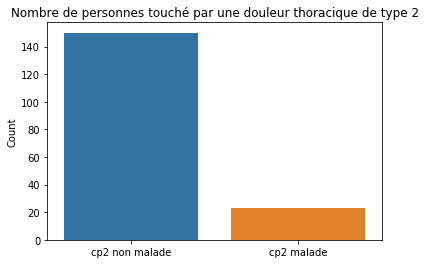

In [43]:
sns.barplot(x=["cp2 non malade","cp2 malade"],y=[count_cp2,count_cp2_malade])
plt.ylabel("Count")
plt.title("Nombre de personnes touché par une douleur thoracique de type 2")

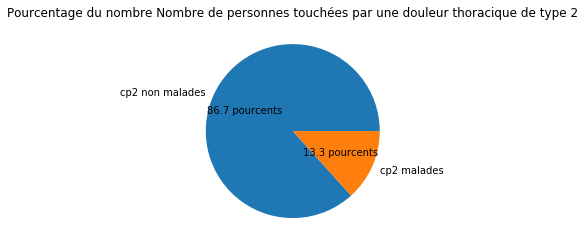

In [44]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie([len(df[(df.cp==2)&(df.num==0)]), len(df[(df.cp==2)&(df.num==1)])],
        labels = ["cp2 non malades", "cp2 malades"],
        autopct="%1.1f pourcents")
plt.title("Pourcentage du nombre Nombre de personnes touchées par une douleur thoracique de type 2")
plt.show()

On remarque une nette différence de proportion entre les personnes non malade et malade dans le cas des personnes touchés par une angine atypique. En effet 86,7% des personnes qui ont une angine atypique ne sont pas malades, soit presque la totalité. Il est donc très rare d'avoir une maladie cardiaque lorsqu'on a une angine atypique


In [47]:
count_cp3 = len(df[(df.cp==3)&(df.num==0)])
count_cp3_malade = len(df[(df.cp==3)&(df.num==1)])

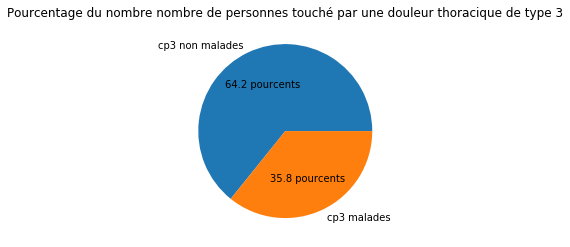

In [48]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie([len(df[(df.cp==3)&(df.num==0)]), len(df[(df.cp==3)&(df.num==1)])],
        labels = ["cp3 non malades", "cp3 malades"],
        autopct="%1.1f pourcents")
plt.title("Pourcentage du nombre nombre de personnes touché par une douleur thoracique de type 3")
plt.show()

On remarque une différence de proportion assez forte entre les personnes non malades et malades dans le cas des personnes touchées par une douleur thoracique différente de celle d’une angine même si cela reste bien inférieur au cas des personnes touchées par une angine atypique.


In [49]:
count_cp4 = len(df[(df.cp==4)&(df.num==0)])
count_cp4_malade = len(df[(df.cp==4)&(df.num==1)|(df.num==2)|(df.num==3)|(df.num==4)])

Text(0.5, 1.0, 'Nombre de personnes touché par une douleur thoracique de type 4')

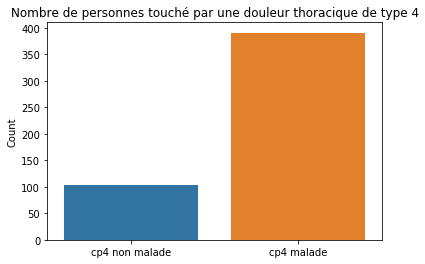

In [50]:
sns.barplot(x=["cp4 non malade","cp4 malade"],y=[count_cp4,count_cp4_malade])
plt.ylabel("Count")
plt.title("Nombre de personnes touché par une douleur thoracique de type 4")

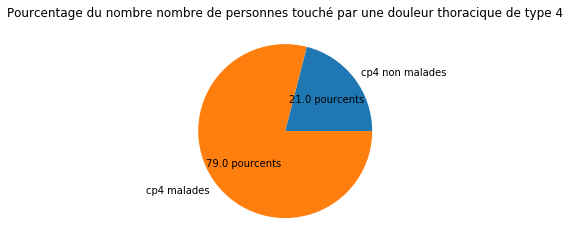

In [51]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie([len(df[(df.cp==4)&(df.num==0)]), len(df[(df.cp==4)&(df.num==1)])],
        labels = ["cp4 non malades", "cp4 malades"],
        autopct="%1.1f pourcents")
plt.title("Pourcentage du nombre nombre de personnes touché par une douleur thoracique de type 4")
plt.show()

On remarque dans le cas des douleurs thoraciques de type 4, dites “asymptotic”, une très forte proportion de personnes malades (79%).

On remarque que la plupart des personnes atteinte par une douleur thoracique sont diagnostiquées avec une maladie cardiaque. Les douleurs thoraciques sont donc des indicateurs de maladie cardiaque même si cela n'est pas exacte dans tous les cas. On remarque cependant qu'il existe des nuances de proportions de personnes malades en fonction du type de douleur. En effet, dans le cas d'une angine atypique les chances d'être diagnostiqué avec une maladie cardiaque sont assez faibles contrairement au cas des personnes ayant une douleur thoracique dites “asymptotic”. Ce dernier cas de douleur thoracique est très fortement indicateur de maladie cardiaque dans la plupart des cas.


Comparaison age et talassemia

On détermine le nombre de personnes atteintes par la thalassémie

Text(0.5, 1.0, 'nombre de personnes atteintes par la thalassémie ')

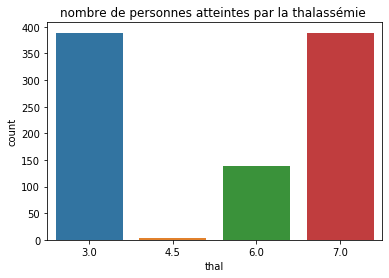

In [52]:
sns.countplot(x='thal', data=df)
plt.title("nombre de personnes atteintes par la thalassémie ")

On remarque que notre dataset comprend en grande partie des personnes sans anomalies, et avec des anomalies réversibles. Ceux dont l'anomalie est constante sont bien moins nombreux

Text(0.5, 1.0, 'Nombre de personnes atteintes de thalassémie en fonction des maladies cardiaques')

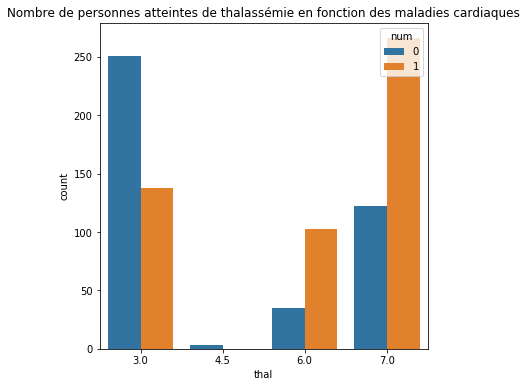

In [53]:
fig,ax=plt.subplots(figsize=(20,6))
plt.subplot(1, 3, 2)
g2=sns.countplot(x='thal',data=df,hue='num')
g2.set_title("Nombre de personnes atteintes de thalassémie en fonction des maladies cardiaques")

On remarque que les personnes sans anomalies (3) sont majoritairement non détectés comme malade cardiaque, au contraire des personnes ayant une anomalie constante (6) et ceux dont elle est réversible (7).
